<a href="https://colab.research.google.com/github/evarito/Supervised_Learning/blob/main/CAT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
mydata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/merged_student_data.csv')
print("Shape of the dataset:", mydata.shape)
mydata.head(50)

Shape of the dataset: (100, 13)


,Student ID,Enrollment Year,Grade Level,Subject,Academic Year,Semester,Grade,Graduation Status,Gender,Ethnicity,Socioeconomic Status,Fee Information,Outcome
0,1001,2018,11,1,2017,1,0.46,0,0,0,0,0,0
1,1002,2019,9,2,2018,1,0.18,1,1,0,1,1,1
2,1003,2017,10,2,2015,0,0.16,0,1,0,0,0,0
3,1004,2019,9,4,2018,0,3.42,1,0,0,0,1,1
4,1005,2019,11,2,2017,1,2.81,0,1,0,1,1,0
5,1006,2016,11,3,2015,0,1.90,1,0,1,0,1,0
6,1007,2017,10,1,2018,0,0.39,1,0,1,0,0,1
7,1008,2017,9,4,2018,1,1.97,0,0,0,0,0,1
8,1009,2017,11,1,2017,0,1.89,1,1,0,0,0,0
9,1010,2019,10,1,2015,1,0.69,0,1,0,0,1,0


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


mydata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/merged_student_data.csv')
X = mydata.drop('Outcome', axis=1)
y = mydata['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
eve = DecisionTreeClassifier(criterion='entropy', random_state=42)
eve.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [7]:
y_pred = eve.predict(X_test)
print (y_pred)

[1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1]


In [8]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy:  0.6
Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.57      0.80      0.67        10

    accuracy                           0.60        20
   macro avg       0.62      0.60      0.58        20
weighted avg       0.62      0.60      0.58        20

Confusion Matrix:
[[4 6]
 [2 8]]


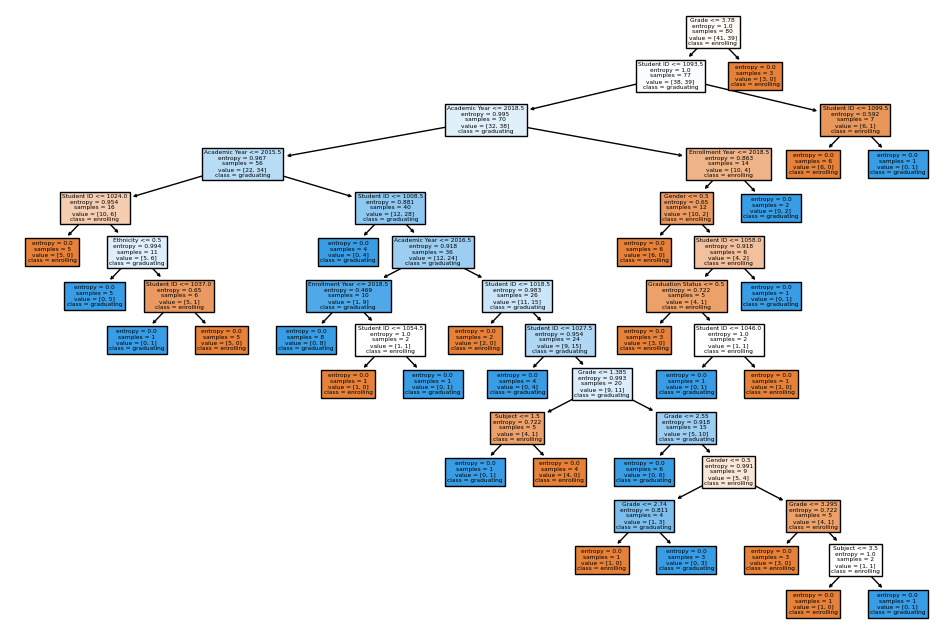

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(eve, filled=True, feature_names = X.columns, class_names=["enrolling","graduating"])
plt.show()

In [11]:
import joblib
eve = DecisionTreeClassifier(random_state=42)
eve.fit(X_train, y_train)
joblib.dump(eve, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [17]:
import joblib
import pandas as pd
loaded_model = joblib.load('/content/decision_tree_model.pkl')
new_data = pd.DataFrame({
    'Student ID': [1025, 1003, 1035, 1078],
    'Enrollment Year': [2017, 2019, 2016, 2015],
    'Grade Level': [8, 9, 10, 9],
    'Subject':[2, 4, 3, 1],
    'Academic Year': [2018, 2016, 2015, 2019],
    'Semester': [1, 0, 1, 0],
    'Grade':[0.05, 0.5, 2.0, 1.69],
    'Graduation Status': [0, 1, 0, 1],
    'Gender': [1, 0, 1, 0],
    'Ethnicity': [0, 1, 1, 0],
    'Socioeconomic Status': [0, 0, 1, 1],
    'Fee Information': [1, 1, 0, 1]
})

In [18]:
predictions = loaded_model.predict(new_data)

graduating_mapping = {0: "0-Support To Graduate", 1: "1-Enroll New Program"}
for i, prediction in enumerate(predictions):
  label = graduating_mapping[prediction]
  print(f"Data {i + 1}: Predicted Outcome -> {label}")


Data 1: Predicted Outcome -> 1-Enroll New Program
Data 2: Predicted Outcome -> 1-Enroll New Program
Data 3: Predicted Outcome -> 1-Enroll New Program
Data 4: Predicted Outcome -> 1-Enroll New Program
